<a href="https://colab.research.google.com/github/LordFagner/projetoAlura/blob/main/alurastorebr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#1. Análise do faturamento


{'loja': 1534509.12, 'loja2': 1488459.06, 'loja3': 1464025.03, 'loja4': 1384497.58}


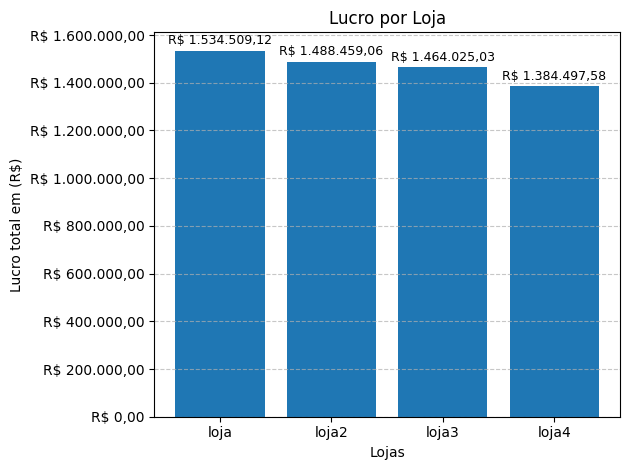

In [ ]:
lojas = [loja, loja2, loja3, loja4]
lojasId = ['loja', 'loja2', 'loja3', 'loja4']
lucro = {chave: float(loja["Preço"].sum()) for chave, loja in zip(lojasId, lojas)}
print(lucro)
bars = plt.bar(x=lucro.keys(), height=lucro.values())
plt.xlabel("lojas")
plt.ylabel("lucro total em (R$)")
plt.title("lucro por loja")

plt.grid(axis='y', linestyle='--', alpha=0.7)

formatter = ticker.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
plt.gca().yaxis.set_major_formatter(formatter)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  yval + (yval * 0.01), formatter(yval, None),  ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
